In [1]:
import sqlalchemy
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import style
style.use('seaborn')
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
import datetime as dt
import matplotlib.pyplot as plt
from sqlalchemy import Column, Integer, String, Float, Text, ForeignKey

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [3]:
Base = automap_base()
Base.prepare(engine, reflect=True)

In [4]:
Base.classes.keys()

['measurements', 'station']

In [5]:
inspector = inspect(engine)
inspector.get_table_names()

['measurements', 'station']

In [6]:
Station_class = Base.classes.station
Measurements_class = Base.classes.measurements

In [7]:
session = Session(engine)

In [8]:
dates = session.query(Measurements_class.date,Measurements_class.prcp).order_by(Measurements_class.date.desc()).group_by(Measurements_class.station).limit(365).all()

In [9]:
dates

In [11]:
a = session.query(Station_class.station).all()

In [13]:
for i in range(len(a)):
    print(a[i][0])

USC00519397
USC00513117
USC00514830
USC00517948
USC00518838
USC00519523
USC00519281
USC00511918
USC00516128


In [10]:
last_date = session.query(Measurements_class.date).order_by(Measurements_class.date.desc()).first()
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

In [11]:
dates1 = session.query(Measurements_class.date,Measurements_class.prcp).filter(Measurements_class.date>=last_year).all()

In [12]:

dates1 = pd.DataFrame(dates1)

In [13]:
dates = dates1.drop_duplicates(subset=["date"], keep="first")

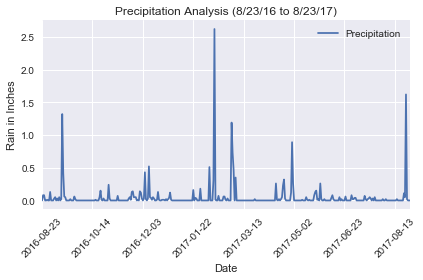

In [14]:
dates.plot("date","prcp")
plt.xlabel("Date")
plt.ylabel("Rain in Inches")
plt.title("Precipitation Analysis (8/23/16 to 8/23/17)")
plt.legend(["Precipitation"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
dates1 = dates.set_index("date")

In [16]:
stations_locations = session.query(Measurements_class).group_by(Measurements_class.station).count()

In [17]:
##observations by station since in the past year
stations1 = session.query(Measurements_class.station,func.count(Measurements_class.tobs)).filter(Measurements_class.date>=last_year).group_by(Measurements_class.station).all()

In [18]:
len(stations1)
busiest_station = stations1[0]
num = 0

In [19]:
for i in range(len(stations1)):
    if stations1[i][1]>num:
        num = stations1[i][1]
        busiest_station = stations1[i]

In [20]:
temperature = session.query(Measurements_class.station, Measurements_class.date, Measurements_class.tobs).filter(Measurements_class.date>=last_year).filter(Measurements_class.station == busiest_station[0]).all()

In [21]:
len(temperature)

359

In [22]:
temperature_df = pd.DataFrame(temperature)

In [23]:
temperature_df.head()

,station,date,tobs
0,USC00519397,2016-08-23,81
1,USC00519397,2016-08-24,79
2,USC00519397,2016-08-25,80
3,USC00519397,2016-08-26,79
4,USC00519397,2016-08-27,77


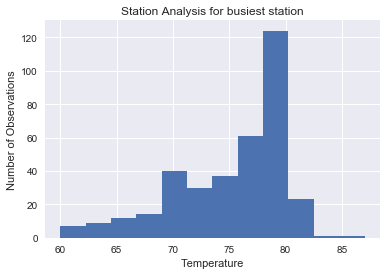

In [24]:
plt.hist(temperature_df["tobs"],12)
plt.xlabel("Temperature")
plt.ylabel("Number of Observations")
plt.title("Station Analysis for busiest station")
plt.show()

In [25]:
def calc_temps(start_date,end_date):
    data_measure = session.query(func.min(Measurements_class.tobs),func.avg(Measurements_class.tobs),func.max(Measurements_class.tobs)).filter(Measurements_class.date>start_date).filter(Measurements_class.date<end_date).all()
    return data_measure

In [26]:
start = dt.date(2013,4,23)
end = dt.date(2013,5,20)
temps = calc_temps(start,end)

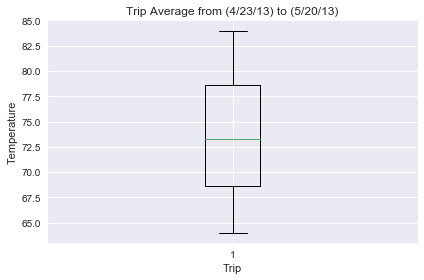

In [27]:

##I guess I do not really need this..
fig,ax = plt.subplots()
x_axis = range(len(temps))
ax.boxplot(temps)
ax.set_title("Trip Average from (4/23/13) to (5/20/13)")
ax.set_xlabel("Trip")
ax.set_ylabel("Temperature")
fig.tight_layout()
plt.show()

In [28]:
last_year

datetime.date(2016, 8, 23)

In [29]:
last_date = dt.date(2017,8,23)

In [30]:
temp_avg_year = calc_temps(last_year,last_date)

In [31]:
range_temp = temp_avg_year[0][2]-temp_avg_year[0][0]
avg_temp = temp_avg_year[0][1]
min_temp = temp_avg_year[0][0]
max_temp = temp_avg_year[0][2]


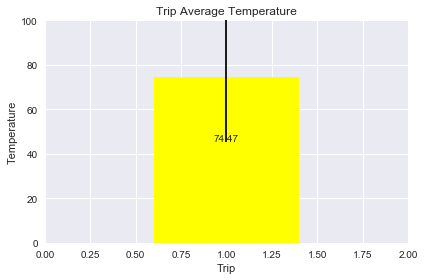

In [35]:
fig,ax = plt.subplots()
temp_bar_chart = ax.bar(1,avg_temp,color = "yellow",yerr = range_temp)
ax.set_xlabel("Trip")
ax.set_ylabel("Temperature")
ax.set_title("Trip Average Temperature")

##I took this code...again
def autolabels(rects):
    for rect in rects:
        h=rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., .6*h,'%.2f' % float(h) ,ha='center', va='bottom', fontsize=10)

autolabels(temp_bar_chart)
plt.ylim(0,100)
plt.xlim(0,2)
fig.tight_layout()
plt.show()
